**README for Customer Churn Prediction Model**

# Overview:
This project implements various machine learning models to predict customer churn for a telecommunications company using the Telco Customer Churn dataset. The goal is to identify customers who are likely to leave the service, allowing the company to take proactive measures to retain them.

# Dataset:
The dataset used in this project is the "Telco Customer Churn" dataset, which contains information about customers, their services, and whether they have churned (left the service). The dataset includes features such as customer demographics, account information, and service usage.

# Libraries Used:
Pandas: For data manipulation and analysis.
NumPy: For numerical operations.
Matplotlib: For plotting and data visualization.
Seaborn: For enhanced data visualization.
Scikit-learn: For machine learning algorithms and evaluation metrics.

# Machine Learning Models:
The following machine learning models are implemented in this project:
Logistic Regression: A statistical model that uses a logistic function to model a binary dependent variable.
Decision Tree Classifier: A model that uses a tree-like graph of decisions and their possible consequences.
K-Nearest Neighbors (KNN): A non-parametric method used for classification and regression by analyzing the 'k' closest training examples.
Random Forest Classifier: An ensemble method that constructs multiple decision trees and merges them to get a more accurate and stable prediction.
Support Vector Classifier (SVC): A supervised learning model that analyzes data for classification and regression analysis.
Gradient Boosting Classifier: An ensemble technique that builds models sequentially, with each new model attempting to correct the errors made by the previous ones.

# Preprocessing Steps:
Loading the Dataset: The dataset is loaded into a Pandas DataFrame.
Data Cleaning:
Convert the 'TotalCharges' column to numeric, coercing errors to NaN.
Fill missing values in 'TotalCharges' with the median.
Drop the 'customerID' column as it is not needed for analysis.
Map 'Churn' values to binary (1 for Yes, 0 for No).
Feature Selection: Identify categorical and numerical features for model training.
Data Transformation:
Scale numerical features using StandardScaler.
One-hot encode categorical features using OneHotEncoder.
Train-Test Split: Split the dataset into training and testing sets while maintaining class distribution.

# Model Training and Evaluation:
Each model is trained on the training set, and predictions are made on the test set.
The following metrics are calculated for each model:
ROC AUC Score: Measures the area under the receiver operating characteristic curve.
Recall Score: Measures the ability of the model to find all the relevant cases (true positives).
The execution time for each model is also recorded.

# Hyperparameter Tuning:
The best models are tuned using GridSearchCV to find the optimal hyperparameters.
The models are evaluated again after tuning, and the best thresholds for recall and AUC are determined.

# Performance Visualization: 
Confusion matrices are plotted for each model to visualize the performance.
ROC curves are plotted to compare the performance of tuned models against their default versions.

# Conclusion:
This project demonstrates the application of various machine learning models to predict customer churn. The results can help the telecommunications company identify at-risk customers and implement strategies to improve customer retention.

Logistic Regression - Time: 0.1067s, ROC AUC: 0.8419, Recall: 0.5588
Decision Tree - Time: 0.0338s, ROC AUC: 0.6573, Recall: 0.5053
KNN - Time: 0.0000s, ROC AUC: 0.7899, Recall: 0.5749
Random Forest - Time: 0.8208s, ROC AUC: 0.8164, Recall: 0.4759
SVC - Time: 6.6919s, ROC AUC: 0.7905, Recall: 0.4840
Gradient Boosting - Time: 0.9787s, ROC AUC: 0.8432, Recall: 0.5241

Best Recall Model (Before Tuning): KNN with Recall: 0.5749
Best ROC AUC Model (Before Tuning): Gradient Boosting with ROC AUC: 0.8432

Best params for KNN: {'n_neighbors': 11, 'weights': 'uniform'} | Tuning Time: 5.8820s

Best params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50} | Tuning Time: 262.8054s

Tuned KNN Evaluation Time: 0.1870s
Tuned KNN ROC AUC: 0.8166
Tuned KNN Recall: 0.5775


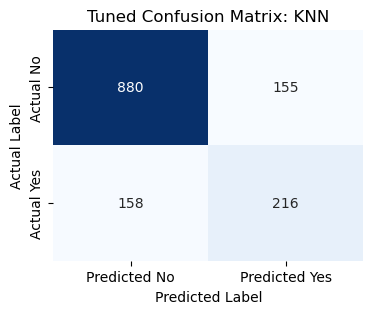


Tuned Gradient Boosting Evaluation Time: 0.0000s
Tuned Gradient Boosting ROC AUC: 0.8320
Tuned Gradient Boosting Recall: 0.5267


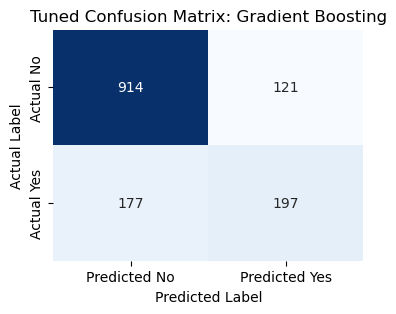

In [2]:
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for enhanced data visualization
import time  # Import time module for measuring execution time
from sklearn.model_selection import train_test_split, GridSearchCV  # Import functions for splitting data and performing grid search
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import preprocessing tools for scaling and encoding
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer for creating preprocessing pipelines
from sklearn.linear_model import LogisticRegression  # Import logistic regression model
from sklearn.tree import DecisionTreeClassifier  # Import decision tree classifier
from sklearn.neighbors import KNeighborsClassifier  # Import K-nearest neighbors classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Import ensemble models
from sklearn.svm import SVC  # Import support vector classifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score, fbeta_score  # Import necessary metrics for evaluation

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')  # Read the CSV file into a DataFrame

# Pre-processing steps
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())  # Fill missing values with the median of 'TotalCharges'
df = df.drop('customerID', axis=1)  # Drop the 'customerID' column as it is not needed for analysis
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Map 'Churn' values to binary (1 for Yes, 0 for No)

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include='object').columns.tolist()  # Get a list of categorical feature names
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Get a list of numerical feature names
numerical_features.remove('Churn')  # Remove 'Churn' from the list of numerical features

# Create a preprocessor for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Prepare feature matrix and target vector
X = df.drop('Churn', axis=1)  # Features (all columns except 'Churn')
y = df['Churn']  # Target variable (Churn)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)  # Stratified split to maintain class distribution

# Fit and transform the training data, and transform the testing data
X_train = preprocessor.fit_transform(X_train)  # Fit the preprocessor and transform the training data
X_test = preprocessor.transform(X_test)  # Transform the testing data using the fitted preprocessor

# Timing dictionary storage for default models and tuning
default_times = {}  # Initialize a dictionary to store execution times for each model

# 1. Logistic Regression
start = time.time()  # Start timing
lr_model = LogisticRegression(random_state=42)  # Initialize logistic regression model
lr_model.fit(X_train, y_train)  # Fit the model to the training data
default_times['Logistic Regression'] = time.time() - start  # Calculate and store the time taken
lr_pred = lr_model.predict(X_test)  # Predict labels on the test data
lr_prob = lr_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
lr_roc_auc = roc_auc_score(y_test, lr_prob)  # Calculate ROC AUC score
lr_recall = recall_score(y_test, lr_pred)  # Calculate recall score
print("Logistic Regression - Time: {:.4f}s, ROC AUC: {:.4f}, Recall: {:.4f}".format(default_times['Logistic Regression'], lr_roc_auc, lr_recall))  # Print results

# 2. Decision Tree
start = time.time()  # Start timing
dt_model = DecisionTreeClassifier(random_state=42)  # Initialize decision tree model
dt_model.fit(X_train, y_train)  # Fit the model to the training data
default_times['Decision Tree'] = time.time() - start  # Calculate and store the time taken
dt_pred = dt_model.predict(X_test)  # Predict labels on the test data
dt_prob = dt_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
dt_roc_auc = roc_auc_score(y_test, dt_prob)  # Calculate ROC AUC score
dt_recall = recall_score(y_test, dt_pred)  # Calculate recall score
print("Decision Tree - Time: {:.4f}s, ROC AUC: {:.4f}, Recall: {:.4f}".format(default_times['Decision Tree'], dt_roc_auc, dt_recall))  # Print results

# 3. KNN
start = time.time()  # Start timing
knn_model = KNeighborsClassifier()  # Initialize KNN model
knn_model.fit(X_train, y_train)  # Fit the model to the training data
default_times['KNN'] = time.time() - start  # Calculate and store the time taken
knn_pred = knn_model.predict(X_test)  # Predict labels on the test data
knn_prob = knn_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
knn_roc_auc = roc_auc_score(y_test, knn_prob)  # Calculate ROC AUC score
knn_recall = recall_score(y_test, knn_pred)  # Calculate recall score
print("KNN - Time: {:.4f}s, ROC AUC: {:.4f}, Recall: {:.4f}".format(default_times['KNN'], knn_roc_auc, knn_recall))  # Print results

# 4. Random Forest
start = time.time()  # Start timing
rf_model = RandomForestClassifier(random_state=42)  # Initialize random forest model
rf_model.fit(X_train, y_train)  # Fit the model to the training data
default_times['Random Forest'] = time.time() - start  # Calculate and store the time taken
rf_pred = rf_model.predict(X_test)  # Predict labels on the test data
rf_prob = rf_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
rf_roc_auc = roc_auc_score(y_test, rf_prob)  # Calculate ROC AUC score
rf_recall = recall_score(y_test, rf_pred)  # Calculate recall score
print("Random Forest - Time: {:.4f}s, ROC AUC: {:.4f}, Recall: {:.4f}".format(default_times['Random Forest'], rf_roc_auc, rf_recall))  # Print results

# 5. SVC
start = time.time()  # Start timing
svc_model = SVC(probability=True, random_state=42)  # Initialize support vector classifier
svc_model.fit(X_train, y_train)  # Fit the model to the training data
default_times['SVC'] = time.time() - start  # Calculate and store the time taken
svc_pred = svc_model.predict(X_test)  # Predict labels on the test data
svc_prob = svc_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
svc_roc_auc = roc_auc_score(y_test, svc_prob)  # Calculate ROC AUC score
svc_recall = recall_score(y_test, svc_pred)  # Calculate recall score
print("SVC - Time: {:.4f}s, ROC AUC: {:.4f}, Recall: {:.4f}".format(default_times['SVC'], svc_roc_auc, svc_recall))  # Print results

# 6. Gradient Boosting
start = time.time()  # Start timing
gb_model = GradientBoostingClassifier(random_state=42)  # Initialize gradient boosting model
gb_model.fit(X_train, y_train)  # Fit the model to the training data
default_times['Gradient Boosting'] = time.time() - start  # Calculate and store the time taken
gb_pred = gb_model.predict(X_test)  # Predict labels on the test data
gb_prob = gb_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
gb_roc_auc = roc_auc_score(y_test, gb_prob)  # Calculate ROC AUC score
gb_recall = recall_score(y_test, gb_pred)  # Calculate recall score
print("Gradient Boosting - Time: {:.4f}s, ROC AUC: {:.4f}, Recall: {:.4f}".format(default_times['Gradient Boosting'], gb_roc_auc, gb_recall))  # Print results

# Store model results in a dictionary
default_models = {
    "Logistic Regression": {'model': lr_model, 'y_pred': lr_pred, 'y_prob': lr_prob, 'roc_auc': lr_roc_auc, 'recall': lr_recall},  # Store results for logistic regression
    "Decision Tree": {'model': dt_model, 'y_pred': dt_pred, 'y_prob': dt_prob, 'roc_auc': dt_roc_auc, 'recall': dt_recall},  # Store results for decision tree
    "KNN": {'model': knn_model, 'y_pred': knn_pred, 'y_prob': knn_prob, 'roc_auc': knn_roc_auc, 'recall': knn_recall},  # Store results for KNN
    "Random Forest": {'model': rf_model, 'y_pred': rf_pred, 'y_prob': rf_prob, 'roc_auc': rf_roc_auc, 'recall': rf_recall},  # Store results for random forest
    "SVC": {'model': svc_model, 'y_pred': svc_pred, 'y_prob': svc_prob, 'roc_auc': svc_roc_auc, 'recall': svc_recall},  # Store results for SVC
    "Gradient Boosting": {'model': gb_model, 'y_pred': gb_pred, 'y_prob': gb_prob, 'roc_auc': gb_roc_auc, 'recall': gb_recall}  # Store results for gradient boosting
}

# Identify the best models based on recall and ROC AUC
best_recall_name = max(default_models, key=lambda k: default_models[k]['recall'])  # Model with the highest recall
best_auc_name = max(default_models, key=lambda k: default_models[k]['roc_auc'])  # Model with the highest ROC AUC

# Print the best models
print(f"\nBest Recall Model (Before Tuning): {best_recall_name} with Recall: {default_models[best_recall_name]['recall']:.4f}")  # Print best recall model
print(f"Best ROC AUC Model (Before Tuning): {best_auc_name} with ROC AUC: {default_models[best_auc_name]['roc_auc']:.4f}")  # Print best AUC model

# Function to tune models using GridSearchCV
def tune_model(model_name, X_train, y_train):
    if model_name == "Logistic Regression":
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Hyperparameters for logistic regression
        base_model = LogisticRegression(random_state=42)  # Initialize logistic regression model
        scoring = 'recall'  # Use recall as the scoring metric
    elif model_name == "Decision Tree":
        param_grid = {
            'max_depth': [3, 5, 7, 10],  # Hyperparameters for decision tree
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 3, 5]
        }
        base_model = DecisionTreeClassifier(random_state=42)  # Initialize decision tree model
        scoring = 'recall'  # Use recall as the scoring metric
    elif model_name == "KNN":
        param_grid = {'n_neighbors': [3, 5, 7, 9, 11],  # Hyperparameters for KNN
                      'weights': ['uniform', 'distance']}
        base_model = KNeighborsClassifier()  # Initialize KNN model
        scoring = 'recall'  # Use recall as the scoring metric
    elif model_name == "Random Forest":
        param_grid = {
            'n_estimators': [50, 100, 200],  # Hyperparameters for random forest
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
        base_model = RandomForestClassifier(random_state=42)  # Initialize random forest model
        scoring = 'recall'  # Use recall as the scoring metric
    elif model_name == "SVC":
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  # Hyperparameters for SVC
        base_model = SVC(probability=True, random_state=42)  # Initialize SVC model
        scoring = 'recall'  # Use recall as the scoring metric
    elif model_name == "Gradient Boosting":
        param_grid = {
            'n_estimators': [50, 100, 200],  # Hyperparameters for gradient boosting
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
        base_model = GradientBoostingClassifier(random_state=42)  # Initialize gradient boosting model
        scoring = 'recall'  # Use recall as the scoring metric
    else:
        raise ValueError(f"Unknown model for tuning: {model_name}")  # Raise error for unknown model

    start = time.time()  # Start timing for tuning
    grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring=scoring)  # Initialize grid search
    grid_search.fit(X_train, y_train)  # Fit grid search to training data
    tuning_time = time.time() - start  # Calculate and store the time taken for tuning
    print(f"\nBest params for {model_name}: {grid_search.best_params_} | Tuning Time: {tuning_time:.4f}s")  # Print best parameters and tuning time
    return grid_search.best_estimator_, tuning_time  # Return the best estimator and tuning time

# Tune the best recall model
best_recall_tuned_model, recall_tuning_time = tune_model(best_recall_name, X_train, y_train)  # Tune the best recall model
# Tune the best AUC model
best_auc_tuned_model, auc_tuning_time = tune_model(best_auc_name, X_train, y_train)  # Tune the best AUC model

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name, tuned=True):
    start = time.time()  # Start timing for evaluation
    y_pred = model.predict(X_test)  # Predict labels on the test data
    y_prob = model.predict_proba(X_test)[:,1]  # Get predicted probabilities for the positive class
    eval_time = time.time() - start  # Calculate and store the time taken for evaluation
    roc_auc = roc_auc_score(y_test, y_prob)  # Calculate ROC AUC score
    recall = recall_score(y_test, y_pred)  # Calculate recall score
    print(f"\n{'Tuned' if tuned else 'Default'} {model_name} Evaluation Time: {eval_time:.4f}s")  # Print evaluation time
    print(f"{'Tuned' if tuned else 'Default'} {model_name} ROC AUC: {roc_auc:.4f}")  # Print ROC AUC score
    print(f"{'Tuned' if tuned else 'Default'} {model_name} Recall: {recall:.4f}")  # Print recall score

    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
    plt.figure(figsize=(4,3))  # Set figure size for the plot
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False,  # Create heatmap for confusion matrix
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title(f"{'Tuned' if tuned else 'Default'} Confusion Matrix: {model_name}")  # Set title for the plot
    plt.ylabel('Actual Label')  # Set y-axis label
    plt.xlabel('Predicted Label')  # Set x-axis label
    plt.show()  # Display the plot

    return y_prob, roc_auc, recall, eval_time  # Return predicted probabilities, ROC AUC, recall, and evaluation time

# Evaluate the tuned best recall model
y_prob_recall_tuned, roc_auc_recall_tuned, recall_recall_tuned, eval_time_recall_tuned = evaluate_model(best_recall_tuned_model, X_test, y_test, best_recall_name, tuned=True)  # Evaluate the best recall model
# Evaluate the tuned best AUC model
y_prob_auc_tuned, roc_auc_auc_tuned, recall_auc_tuned, eval_time_auc_tuned = evaluate_model(best_auc_tuned_model, X_test, y_test, best_auc_name, tuned=True)  # Evaluate the best AUC model



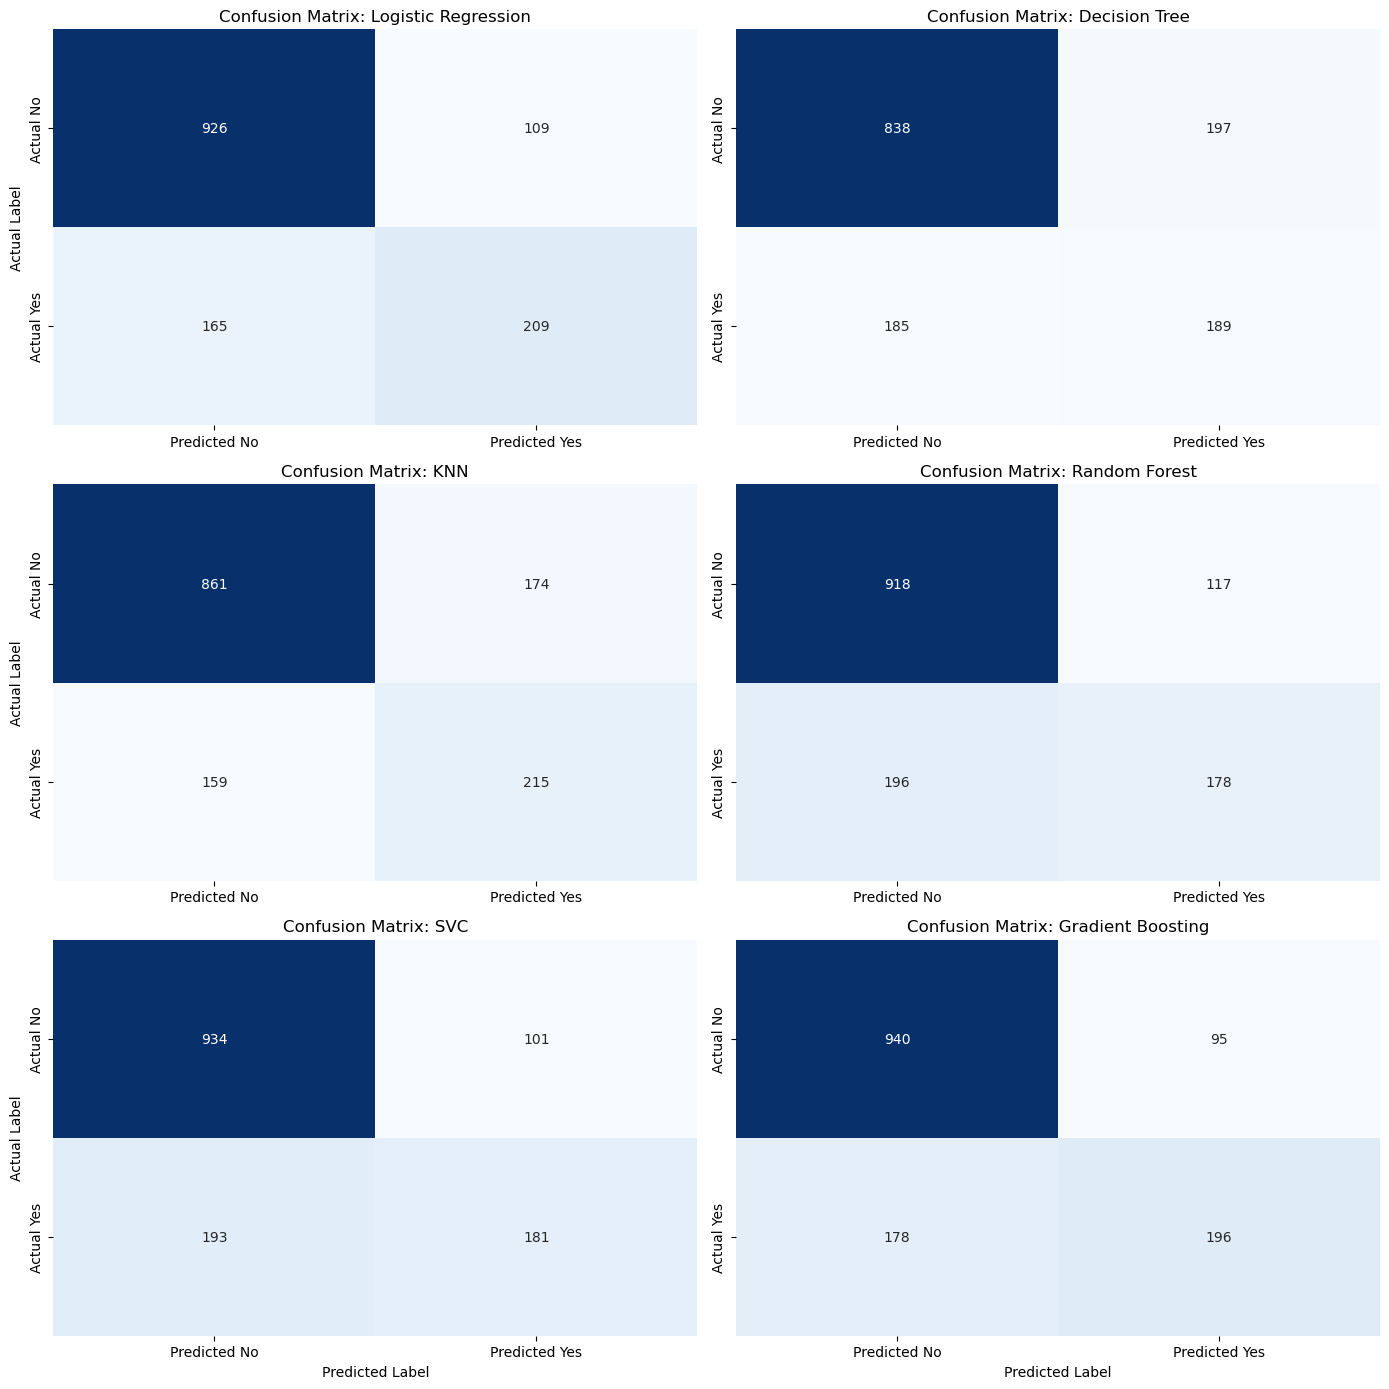

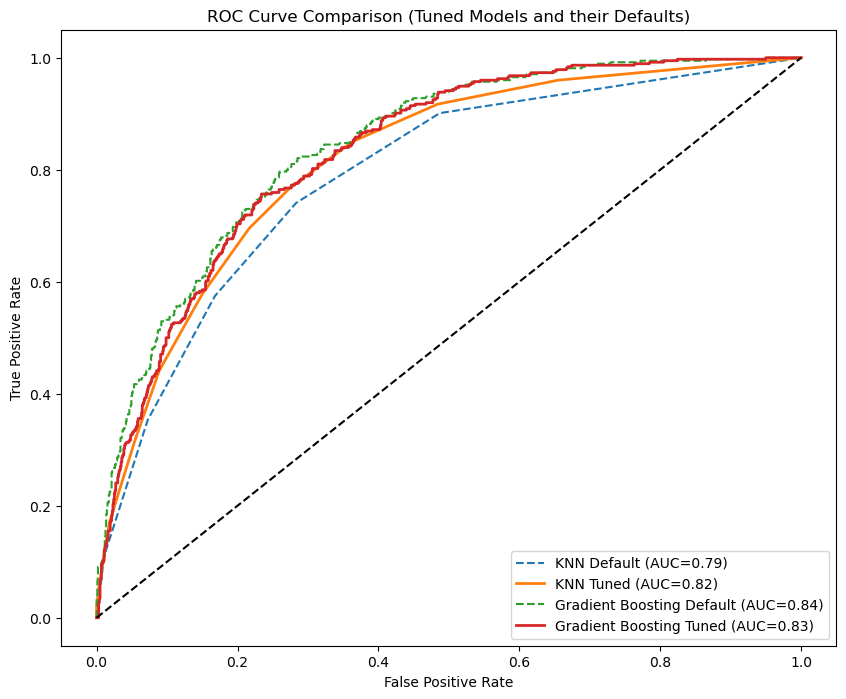


Recall Comparison:
Best Recall Model (Default) KNN: 0.5749
Best Recall Model (Tuned) KNN: 0.5775
Best AUC Model (Default) Gradient Boosting: 0.5241
Best AUC Model (Tuned) Gradient Boosting: 0.5267


In [2]:
# Plot all default confusion matrices in 3x2 grid
def plot_all_confusion_matrices(default_models, y_test):
    model_names = list(default_models.keys())  # Get the names of the models from the dictionary
    preds = [default_models[name]['y_pred'] for name in model_names]  # Extract predictions for each model

    fig, axes = plt.subplots(3, 2, figsize=(14, 14))  # Create a 3x2 grid of subplots with specified figure size
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for i, ax in enumerate(axes):  # Iterate over each subplot and its corresponding index
        cm = confusion_matrix(y_test, preds[i])  # Compute the confusion matrix for the current model's predictions
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,  # Create a heatmap for the confusion matrix
                    xticklabels=['Predicted No', 'Predicted Yes'],  # Set x-axis labels
                    yticklabels=['Actual No', 'Actual Yes'],  # Set y-axis labels
                    ax=ax)  # Assign the heatmap to the current subplot
        ax.set_title(f"Confusion Matrix: {model_names[i]}")  # Set the title for the current subplot
        if i % 2 == 0:  # If the index is even (left column)
            ax.set_ylabel('Actual Label')  # Set the y-axis label
        else:
            ax.set_ylabel('')  # Leave the y-axis label blank for the right column
        if i // 2 == 2:  # If the index corresponds to the bottom row
            ax.set_xlabel('Predicted Label')  # Set the x-axis label
        else:
            ax.set_xlabel('')  # Leave the x-axis label blank for the top rows
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()  # Display the plot

# Call the function to plot confusion matrices for all default models
plot_all_confusion_matrices(default_models, y_test)

# Plot ROC curves of only tuned models and their corresponding pre-tuned models
plt.figure(figsize=(10, 8))  # Create a new figure for the ROC curves with specified size

# Plot tuned best recall model and its default version
fpr, tpr, _ = roc_curve(y_test, default_models[best_recall_name]['y_prob'])  # Calculate false positive and true positive rates for the default model
plt.plot(fpr, tpr, linestyle='--', label=f"{best_recall_name} Default (AUC={default_models[best_recall_name]['roc_auc']:.2f})")  # Plot the ROC curve for the default model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_recall_tuned)  # Calculate false positive and true positive rates for the tuned model
plt.plot(fpr_tuned, tpr_tuned, label=f"{best_recall_name} Tuned (AUC={roc_auc_recall_tuned:.2f})", linewidth=2)  # Plot the ROC curve for the tuned model

# Plot tuned best AUC model and its default version
fpr, tpr, _ = roc_curve(y_test, default_models[best_auc_name]['y_prob'])  # Calculate false positive and true positive rates for the default AUC model
plt.plot(fpr, tpr, linestyle='--', label=f"{best_auc_name} Default (AUC={default_models[best_auc_name]['roc_auc']:.2f})")  # Plot the ROC curve for the default AUC model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_auc_tuned)  # Calculate false positive and true positive rates for the tuned AUC model
plt.plot(fpr_tuned, tpr_tuned, label=f"{best_auc_name} Tuned (AUC={roc_auc_auc_tuned:.2f})", linewidth=2)  # Plot the ROC curve for the tuned AUC model

plt.plot([0, 1], [0, 1], 'k--')  # Plot a diagonal line for reference (random classifier)
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('ROC Curve Comparison (Tuned Models and their Defaults)')  # Set the title for the plot
plt.legend(loc='lower right')  # Add a legend in the lower right corner
plt.show()  # Display the ROC curve plot

# Print recall comparison for the best models
print("\nRecall Comparison:")  # Print a header for the recall comparison
print(f"Best Recall Model (Default) {best_recall_name}: {default_models[best_recall_name]['recall']:.4f}")  # Print recall for the default best recall model
print(f"Best Recall Model (Tuned) {best_recall_name}: {recall_recall_tuned:.4f}")  # Print recall for the tuned best recall model
print(f"Best AUC Model (Default) {best_auc_name}: {default_models[best_auc_name]['recall']:.4f}")  # Print recall for the default best AUC model
print(f"Best AUC Model (Tuned) {best_auc_name}: {recall_auc_tuned:.4f}")  # Print recall for the tuned best AUC model


C:\Users\sabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Threshold for Best Recall Model:
Threshold       0.300000
Precision       0.502627
Recall          0.767380
F-beta Score    0.631133
Name: 3, dtype: float64

Best Threshold for Best AUC Model:
Threshold       0.300000
Precision       0.544379
Recall          0.737968
F-beta Score    0.644095
Name: 3, dtype: float64


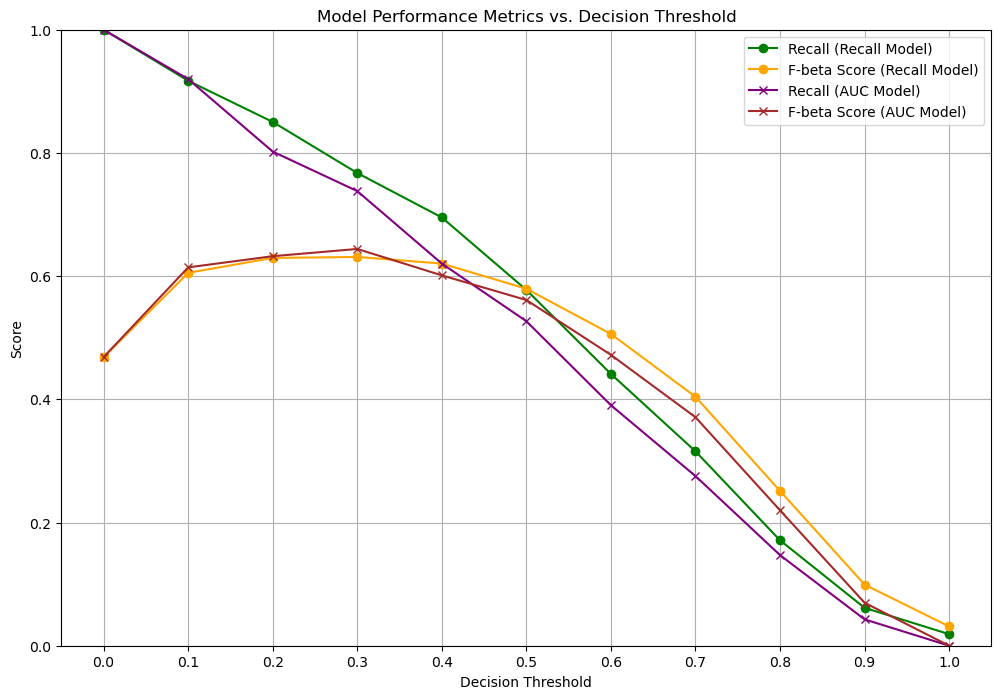

In [3]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score, fbeta_score  # Import necessary metrics for model evaluation

# Assuming you have two trained models and test data
y_prob_recall_tuned = best_recall_tuned_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class from the tuned recall model
y_prob_auc_tuned = best_auc_tuned_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class from the tuned AUC model

# Generate thresholds from 0.0 to 1.0 in increments of 0.1
thresholds = np.arange(0.0, 1.1, 0.1)  # Create an array of thresholds for evaluation

# Initialize lists to store results for both models
results_recall_model = []  # List to store results for the recall model
results_auc_model = []  # List to store results for the AUC model

# Define beta value (e.g., beta > 1 gives more weight to recall)
beta = 1.2  # Set beta value for F-beta score calculation

# Evaluate model performance at each threshold for the recall model
for threshold in thresholds:  # Iterate over each threshold
    y_pred_recall = (y_prob_recall_tuned >= threshold).astype(int)  # Convert probabilities to binary predictions based on the threshold
    precision_recall = precision_score(y_test, y_pred_recall)  # Calculate precision for the recall model
    recall_recall = recall_score(y_test, y_pred_recall)  # Calculate recall for the recall model
    fbeta_recall = fbeta_score(y_test, y_pred_recall, beta=beta)  # Calculate F-beta score for the recall model
    
    results_recall_model.append({  # Append results to the recall model results list
        'Threshold': threshold,  # Store the threshold
        'Precision': precision_recall,  # Store the precision
        'Recall': recall_recall,  # Store the recall
        'F-beta Score': fbeta_recall  # Store the F-beta score
    })

# Evaluate model performance at each threshold for the AUC model
for threshold in thresholds:  # Iterate over each threshold
    y_pred_auc = (y_prob_auc_tuned >= threshold).astype(int)  # Convert probabilities to binary predictions based on the threshold
    precision_auc = precision_score(y_test, y_pred_auc)  # Calculate precision for the AUC model
    recall_auc = recall_score(y_test, y_pred_auc)  # Calculate recall for the AUC model
    fbeta_auc = fbeta_score(y_test, y_pred_auc, beta=beta)  # Calculate F-beta score for the AUC model
    
    results_auc_model.append({  # Append results to the AUC model results list
        'Threshold': threshold,  # Store the threshold
        'Precision': precision_auc,  # Store the precision
        'Recall': recall_auc,  # Store the recall
        'F-beta Score': fbeta_auc  # Store the F-beta score
    })

# Convert results to DataFrames
results_df_recall_model = pd.DataFrame(results_recall_model)  # Create a DataFrame for recall model results
results_df_auc_model = pd.DataFrame(results_auc_model)  # Create a DataFrame for AUC model results

# Find the best threshold based on F-beta Score for both models
best_threshold_recall_model = results_df_recall_model.loc[results_df_recall_model['F-beta Score'].idxmax()]  # Get the row with the highest F-beta score for the recall model
best_threshold_auc_model = results_df_auc_model.loc[results_df_auc_model['F-beta Score'].idxmax()]  # Get the row with the highest F-beta score for the AUC model

print("Best Threshold for Best Recall Model:")  # Print statement for best recall model threshold
print(best_threshold_recall_model)  # Display the best threshold results for the recall model

print("\nBest Threshold for Best AUC Model:")  # Print statement for best AUC model threshold
print(best_threshold_auc_model)  # Display the best threshold results for the AUC model

# Plotting the results
plt.figure(figsize=(12, 8))  # Create a new figure for plotting with specified size

# Plot for Best Recall Model
#plt.plot(results_df_recall_model['Threshold'], results_df_recall_model['Precision'], marker='o', label='Precision (Recall Model)', color='blue')  # Uncomment to plot precision for recall model
plt.plot(results_df_recall_model['Threshold'], results_df_recall_model['Recall'], marker='o', label='Recall (Recall Model)', color='green')  # Plot recall for recall model
plt.plot(results_df_recall_model['Threshold'], results_df_recall_model['F-beta Score'], marker='o', label='F-beta Score (Recall Model)', color='orange')  # Plot F-beta score for recall model

# Plot for Best AUC Model
#plt.plot(results_df_auc_model['Threshold'], results_df_auc_model['Precision'], marker='x', label='Precision (AUC Model)', color='red')  # Uncomment to plot precision for AUC model
plt.plot(results_df_auc_model['Threshold'], results_df_auc_model['Recall'], marker='x', label='Recall (AUC Model)', color='purple')  # Plot recall for AUC model
plt.plot(results_df_auc_model['Threshold'], results_df_auc_model['F-beta Score'], marker='x', label='F-beta Score (AUC Model)', color='brown')  # Plot F-beta score for AUC model

# Adding labels and title
plt.title('Model Performance Metrics vs. Decision Threshold')  # Set the title for the plot
plt.xlabel('Decision Threshold')  # Set the x-axis label
plt.ylabel('Score')  # Set the y-axis label
plt.xticks(thresholds)  # Set x-ticks to be the thresholds
plt.ylim(0, 1)  # Set y-limits to be between 0 and 1
plt.legend()  # Display the legend
plt.grid()  # Add a grid to the plot
plt.show()  # Display the plot


**SELECTION REASONING FROM BUSINESS AND FINANCIAL PERSPECTIVE:**

Selecting the KNN model for customer churn prediction can significantly impact business outcomes by enhancing customer retention strategies. A high recall score ensures that most customers likely to churn are identified, while a balanced approach to false positives and negatives minimizes unnecessary discounts or offers, optimizing resource allocation.

Business Perspective and Financial Impacts

Customer Retention:
Implementing KNN with a strong recall score allows the business to effectively identify at-risk customers. By targeting these individuals with tailored retention strategies, the company can reduce churn rates, leading to increased customer lifetime value (CLV) and overall revenue stability.

Cost Efficiency:
The cost of acquiring new customers is significantly higher than retaining existing ones. By minimizing false positives (offering discounts to non-churners), the business can avoid unnecessary expenses, ensuring that marketing budgets are spent effectively. This leads to better financial health and improved profit margins.

Resource Allocation:
A balanced approach to false negatives and false positives allows the company to allocate resources more efficiently. By focusing on customers who are genuinely at risk of leaving, the business can tailor its marketing efforts and customer service initiatives, enhancing customer satisfaction and loyalty.

Predictive Insights:
Utilizing KNN provides valuable insights into customer behavior patterns. Understanding the factors that contribute to churn enables the business to make informed decisions about product offerings, pricing strategies, and customer engagement practices, ultimately driving long-term growth.

Competitive Advantage:
By effectively predicting and managing customer churn, the company can differentiate itself from competitors. A reputation for excellent customer service and proactive retention strategies can attract new customers, further enhancing market share and profitability.

Long-term Financial Stability:
Reducing churn not only stabilizes revenue but also contributes to long-term financial health. A loyal customer base leads to consistent cash flow, allowing for reinvestment in business growth initiatives, innovation, and expansion opportunities.

In summary, selecting KNN for churn prediction not only improves operational efficiency but also has profound implications for financial performance and strategic positioning in the market.